In [6]:
#import 
import pandas as pd
import os
import numpy as np

In [7]:
#read in file that was exported from SQL database

file2 = "UnitData.csv"
data2 = pd.read_csv(file2, encoding='utf8')
# data2.head(10)

In [8]:
import re
# frame with split value columns 
UnitNum = data2["UnitType"].str.split(" - ", n = 1, expand = True) 
IncidentCode = data2['TypeCodeDescription'].str.split(" - ", n=1, expand = True)
# StationNum = data2["UnitID"].str[-2:]


# making separate first name column from new data frame 
data2["UnitNumber"]= UnitNum[0]   
data2["UnitType"]= UnitNum[1] 
data2["IncidentCode"]= IncidentCode[0]   
data2["IncidentDescription"]= IncidentCode[1] 
# data2['StationNumber'] = StationNum

 
# df display 
# data2.to_csv('test.csv', header=True, index =0)

In [9]:
import re


StationNum = data2['UnitID'].str.extract('(\d+)')

data2['StationNumber'] = StationNum

data2

,Incident_date,CR,fullAddress,Lat,Long,PSAP,AlarmTime,FirstArrivalDispatchTime,FirstArrivalTime,TypeCodeDescription,...,UnitEnRouteTime,UnitArrivalTime,UnitClearTime,CrewMembers,UnitID,UnitType,UnitNumber,IncidentCode,IncidentDescription,StationNumber
0,3/8/2017 9:02,ACFR17-0001268,9400 ELM Court,39.867147,-105.022672,3/8/2017 9:02,3/8/2017 9:04,3/8/2017 9:04,NaN,611 - Dispatched and cancelled en route,...,3/8/2017 9:05:12,NaN,3/8/2017 9:12,"Kerry Furst,Verne Ullrich,Jon Hermann",E15,Engine,11,611,Dispatched and cancelled en route,15
1,3/8/2017 9:02,ACFR17-0001268,9400 ELM Court,39.867147,-105.022672,3/8/2017 9:02,3/8/2017 9:04,3/8/2017 9:04,NaN,611 - Dispatched and cancelled en route,...,NaN,NaN,3/8/2017 9:12,Clinton Garner,BC11,Chief officer car,92,611,Dispatched and cancelled en route,11
2,3/8/2017 9:15,ACFR17-0001269,1141 West 69TH Avenue,39.821822,-105.000990,3/8/2017 9:15,3/8/2017 9:16,3/8/2017 9:16,3/8/2017 9:24,"321 - EMS call, excluding vehicle accident wit...",...,3/8/2017 9:17:25,NaN,3/8/2017 9:18,"Corey Davidson,Carie Porter,Michael Trunkenbolz",TRK11,Truck or aerial,12,321,"EMS call, excluding vehicle accident with injury",11
3,3/8/2017 9:15,ACFR17-0001269,1141 West 69TH Avenue,39.821822,-105.000990,3/8/2017 9:15,3/8/2017 9:16,3/8/2017 9:16,3/8/2017 9:24,"321 - EMS call, excluding vehicle accident wit...",...,3/8/2017 9:17:25,3/8/2017 9:24:14,3/8/2017 9:54,"Alex Dill,Tyler Humphries",M11,ALS unit,76,321,"EMS call, excluding vehicle accident with injury",11
4,3/8/2017 9:17,ACFR17-0001270,3205 West 64TH Avenue,39.812831,-105.028496,3/8/2017 9:17,3/8/2017 9:18,3/8/2017 9:18,3/8/2017 9:22,"321 - EMS call, excluding vehicle accident wit...",...,3/8/2017 9:19:12,NaN,3/8/2017 9:20,"Matt Leete,Alex Petty,Mike Angelo",E12,Engine,11,321,"EMS call, excluding vehicle accident with injury",12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64150,5/8/2020 20:29,ACFR20-0002988,3266 West LONGFELLOW Place,39.815536,-105.029442,5/8/2020 20:29,5/8/2020 20:29,5/8/2020 20:29,5/8/2020 21:00,NaN,...,5/8/2020 20:31:28,5/8/2020 21:00:52,5/8/2020 21:41,"Cody Grove,Alex Dill",M12,ALS unit,76,NaN,NaN,12
64151,5/8/2020 21:43,ACFR20-0002989,6000 FEDERAL Boulevard,39.805988,-105.024873,5/8/2020 21:43,5/8/2020 21:44,5/8/2020 21:44,NaN,NaN,...,NaN,NaN,NaN,"Jana Gilchrist,Brad Kramer,Michael Trunkenbolz",E12,Engine,11,NaN,NaN,12
64152,5/8/2020 21:43,ACFR20-0002989,6000 FEDERAL Boulevard,39.805988,-105.024873,5/8/2020 21:43,5/8/2020 21:44,5/8/2020 21:44,NaN,NaN,...,5/8/2020 21:45:15,NaN,NaN,"Cody Grove,Alex Dill",M12,ALS unit,76,NaN,NaN,12
64153,5/8/2020 21:43,ACFR20-0002990,7788 FLORADO Street,39.837937,-105.011381,5/8/2020 21:43,5/8/2020 21:45,5/8/2020 21:45,NaN,NaN,...,5/8/2020 21:46:43,NaN,NaN,"Chris Huttrer,Mike Eason,Mike Angelo",E11,Engine,11,NaN,NaN,11


In [10]:
#import dependencies 
from datetime import datetime
import time

#drop NAs from two columns we need the datetime delta from
dataturnout = data2.dropna(subset = ["UnitDispatchTime", "UnitEnRouteTime"]) 
# dataturnout

In [11]:
#cast two columns to datetime and get the delta to calculate seconds

dataturnout['UnitDispatchTime'] = pd.to_datetime(dataturnout["UnitDispatchTime"])
dataturnout['UnitEnRouteTime'] = pd.to_datetime(dataturnout['UnitEnRouteTime'])

dataturnout['TurnaroundTime'] = (dataturnout['UnitEnRouteTime'] - dataturnout['UnitDispatchTime']).dt.seconds

# dataturnout


C:\Users\RosenqS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RosenqS\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\RosenqS\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [12]:
#get the month day and year so that we can join data
dataturnout['DATEForJoin'] = dataturnout['UnitDispatchTime'].apply(lambda x: x.strftime('%m-%d-%Y')) 
# dataturnout

C:\Users\RosenqS\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
#drop NAs for columns 
datatraveltime = data2.dropna(subset = ["UnitEnRouteTime", "UnitArrivalTime"]) 
# datatraveltime

In [14]:
#cast two columns to datetime and get the delta to calculate seconds
datatraveltime['UnitArrivalTime'] = pd.to_datetime(datatraveltime["UnitArrivalTime"])
datatraveltime['UnitEnRouteTime'] = pd.to_datetime(datatraveltime['UnitEnRouteTime'])

datatraveltime['TravelTime'] = (datatraveltime['UnitArrivalTime'] - datatraveltime['UnitEnRouteTime']).dt.seconds
# datatraveltime

C:\Users\RosenqS\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RosenqS\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RosenqS\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [15]:
#pull out day month year into a new column so we can join weather data
datatraveltime['DATEForJoin'] = datatraveltime['UnitArrivalTime'].apply(lambda x: x.strftime('%m-%d-%Y')) 
# datatravrltime.head(10)

C:\Users\RosenqS\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
#read csv with weather data
file3 = "CompleteWeatherData.csv"
WeatherData = pd.read_csv(file3, encoding='utf8')
# WeatherData.head(10)

In [17]:
#create a date column with month day and year to join on our fire data data frames
WeatherData['DATE'] = pd.to_datetime(WeatherData["DATE"])
WeatherData['DATEForJoin'] = WeatherData['DATE'].apply(lambda x: x.strftime('%m-%d-%Y')) 
WeatherData

,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,DATEForJoin
0,2017-01-01,NaN,NaN,0.00,0.0,0.0,29.0,47,16,01-01-2017
1,2017-01-02,NaN,NaN,0.00,0.0,0.0,31.0,52,15,01-02-2017
2,2017-01-03,NaN,NaN,0.00,0.0,0.0,20.0,32,10,01-03-2017
3,2017-01-04,NaN,NaN,0.10,1.5,0.0,11.0,12,4,01-04-2017
4,2017-01-05,NaN,NaN,0.24,2.6,3.9,4.0,5,-2,01-05-2017
...,...,...,...,...,...,...,...,...,...,...
1223,2020-05-08,NaN,NaN,0.00,0.0,0.0,47.0,63,33,05-08-2020
1224,2020-05-09,NaN,NaN,0.00,0.0,0.0,51.0,60,39,05-09-2020
1225,2020-05-10,NaN,NaN,0.00,0.0,0.0,48.0,65,33,05-10-2020
1226,2020-05-11,NaN,NaN,0.11,0.0,0.0,43.0,53,36,05-11-2020


In [18]:
#drop columns in weather data
WeatherData = WeatherData.drop(['DAPR', 'MDPR', 'DATE'], axis=1)

In [19]:
#join weather data to both of our data frames
TurnAroundTime = pd.merge(dataturnout, WeatherData, on="DATEForJoin", how="left")
TravelTime = pd.merge(datatraveltime, WeatherData, on="DATEForJoin", how="left")

# TurnAroundTime.head(10)

In [20]:
#cast incident dates for both data frames 

TurnAroundTime['Incident_date'] = pd.to_datetime(TurnAroundTime['Incident_date'])
TravelTime['Incident_date'] = pd.to_datetime(TravelTime['Incident_date'])



# TurnAroundTime.head(10)

In [21]:
TurnAroundTime['HourofDay'] = TurnAroundTime['Incident_date'].apply(lambda x: x.strftime('%H')) 
TravelTime['HourofDay'] = TravelTime['Incident_date'].apply(lambda x: x.strftime('%H'))


# TurnAroundTime.head(10)

In [22]:



HoursDict ={'HourofDay' : ['00', '01', '02','03', '04', '05' ,'06', '07', '08', '09', '10',"11","12","13","14","15","16","17","18","19","20","21","22","23"],
            'TimeofDay' : ['Night', 'Night', 'Night', 'Night', 'Night','Night', 'Day' , 'Day', 'Day', 'Day','Day','Day','Day','Day','Day','Day','Day','Evening','Evening','Evening','Evening','Evening','Night','Night']
             }

CallTypeDictionary ={'IncidentCode':['111', '112', '113', '114', '120', '121', '122', '140', '141', '142', '143', '320', '321', '311', '322', '323', '324', '362', '360'],
                     'IncidentClassification': ['Structure Fire', 'Structure Fire', 'Structure Fire', 'Structure Fire', 'Structure Fire','Structure Fire','Structure Fire', 'Vegetation Fire', 'Vegetation Fire', 'Vegetation Fire', 'Vegetation Fire', 'EMS', 'EMS', 'EMS', 'MVA', 'MVA', 'MVA', 'Ice Rescue', 'Ice Rescue']
                    }

HoursDict=pd.DataFrame(HoursDict)
CallTypeDictionary = pd.DataFrame(CallTypeDictionary)


TurnAroundTime=TurnAroundTime.merge(HoursDict, on='HourofDay', how='left')
TravelTime = TravelTime.merge(HoursDict, on='HourofDay', how='left')

TurnAroundTime=TurnAroundTime.merge(CallTypeDictionary, on='IncidentCode', how='left')
TravelTime = TravelTime.merge(CallTypeDictionary, on='IncidentCode', how='left')

# TurnAroundTime
# TravelTime.to_csv('test.csv',header = True, index=0)

In [23]:
#Get column names
TurnAroundTime.columns


Index(['Incident_date', 'CR', 'fullAddress', 'Lat', 'Long', 'PSAP',
       'AlarmTime', 'FirstArrivalDispatchTime', 'FirstArrivalTime',
       'TypeCodeDescription', 'ActionsTaken', 'PriStation', 'AidGivenReceived',
       'TypeCategory', 'zone', 'UnitDispatchTime', 'UnitEnRouteTime',
       'UnitArrivalTime', 'UnitClearTime', 'CrewMembers', 'UnitID', 'UnitType',
       'UnitNumber', 'IncidentCode', 'IncidentDescription', 'StationNumber',
       'TurnaroundTime', 'DATEForJoin', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX',
       'TMIN', 'HourofDay', 'TimeofDay', 'IncidentClassification'],
      dtype='object')

In [24]:
#Drop stations we still love, but don't need

StationsWeLove = ['11','12','13','14','15']

TurnAroundTime = TurnAroundTime.loc[TurnAroundTime['StationNumber'].isin(StationsWeLove)]
TravelTime = TravelTime.loc[TravelTime['StationNumber'].isin(StationsWeLove)]

# TurnAroundTime["StationNumber"].head(10)

In [25]:
# df['Tenant'].replace('', np.nan, inplace=True)

TurnAroundTime = TurnAroundTime.dropna(subset = ["IncidentClassification"])
TravelTime = TravelTime.dropna()

# datatraveltime = data2.dropna(subset = ["UnitEnRouteTime", "UnitArrivalTime"]) 


In [26]:
#Start Machine Learning
#OneHotEncoding encodes our catagorical data in a numerical/boolean/binary way
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = TurnAroundTime[["TimeofDay"]]
enc.fit(X)

enc.categories_

TATTimeOfDay = pd.DataFrame(enc.transform(X).toarray())

TATTimeOfDay.columns = enc.categories_

TATTimeOfDay

,Day,Evening,Night
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
35838,1.0,0.0,0.0
35839,1.0,0.0,0.0
35840,1.0,0.0,0.0
35841,0.0,1.0,0.0


In [27]:

enc = OneHotEncoder(handle_unknown='ignore')
X = TurnAroundTime[["StationNumber"]]
enc.fit(X)

enc.categories_

Station = pd.DataFrame(enc.transform(X).toarray())

Station.columns = enc.categories_

Station

,11,12,13,14,15
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
35838,0.0,0.0,1.0,0.0,0.0
35839,1.0,0.0,0.0,0.0,0.0
35840,0.0,0.0,0.0,1.0,0.0
35841,0.0,0.0,0.0,1.0,0.0


In [28]:
#concatenated binary data on dataframe to build dataframe for analysis

data = pd.concat([TurnAroundTime[["TurnaroundTime", "SNOW"]], TATTimeOfDay, Station], axis=1)
data = data.dropna()
data

,TurnaroundTime,SNOW,"(Day,)","(Evening,)","(Night,)","(11,)","(12,)","(13,)","(14,)","(15,)"
1,42.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,41.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,39.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,39.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,35.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
35835,87.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35838,62.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35839,96.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35840,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
#assigns x and y to feed into train test split. X is what we feed into the model and y is what we predict 
X = data.drop("TurnaroundTime", axis=1)
Y = data["TurnaroundTime"]

In [30]:
#split x and y into train and test in random groups x values will predict our y values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [31]:
#running the machine learning prints our score
from sklearn.ensemble import RandomForestRegressor
#try extra parameters in rf = 
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)


-0.054641130082895506

In [32]:
from sklearn.metrics import r2_score
y_prediction = rf.predict(X_test)
r2_score(y_prediction, y_test)

-16.751721285058053

In [33]:
#Showing the weight of each feature in the analysis to see if you want to drop features. Tells you what features are important. 
feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.32924473986160663, 'SNOW'),
 (0.29404182476901664, ('11',)),
 (0.12334742676263262, ('Night',)),
 (0.08574599400875074, ('Evening',)),
 (0.06330167972940103, ('Day',)),
 (0.047712629418893086, ('12',)),
 (0.03737688355804939, ('13',)),
 (0.01653214136737128, ('14',)),
 (0.0026966805242785753, ('15',))]

In [34]:
#print predicted values
rf.predict(X_test)

array([100.34338588, 100.7973943 , 100.98404899, ..., 100.34338588,
        94.17927276, 100.49265315])

In [35]:
# TurnAroundTime.to_csv("test.csv", header = True, index =0)

In [36]:
#Start of analysis two
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# X = TurnAroundTime[["IncidentClassification"]]
# enc.fit(X)

# enc.categories_

# IncidentClass = pd.DataFrame(enc.transform(X).toarray())

# IncidentClass.columns = enc.categories_

# IncidentClass

,EMS,Ice Rescue,MVA,Structure Fire,Vegetation Fire
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
35838,0.0,0.0,0.0,0.0,1.0
35839,1.0,0.0,0.0,0.0,0.0
35840,1.0,0.0,0.0,0.0,0.0
35841,1.0,0.0,0.0,0.0,0.0


In [40]:
data2 = pd.concat([TurnAroundTime[["IncidentClassification", "SNOW", "PRCP", "TMAX", "TMIN"]], TATTimeOfDay], axis=1)
data2 = data2.dropna()
data2

,IncidentClassification,SNOW,PRCP,TMAX,TMIN,"(Day,)","(Evening,)","(Night,)"
1,EMS,0.0,0.0,67.0,21.0,1.0,0.0,0.0
2,EMS,0.0,0.0,67.0,21.0,1.0,0.0,0.0
3,EMS,0.0,0.0,67.0,21.0,1.0,0.0,0.0
4,EMS,0.0,0.0,67.0,21.0,1.0,0.0,0.0
5,EMS,0.0,0.0,67.0,21.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
35835,EMS,0.0,0.0,30.0,33.0,1.0,0.0,0.0
35838,EMS,0.0,0.0,30.0,33.0,1.0,0.0,0.0
35839,EMS,0.0,0.0,30.0,33.0,1.0,0.0,0.0
35840,EMS,0.0,0.0,30.0,33.0,1.0,0.0,0.0


In [41]:
X = data2.drop("IncidentClassification", axis=1)
Y = data2["IncidentClassification"]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
#try extra parameters in rf = 
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
#predicted 73% accuracy count of each catagory 98% are EMS then we get a 98% accuracy which looks good but the machine did not learn

0.7262972735268249

In [45]:
feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4612858655164477, 'TMAX'),
 (0.397409736322502, 'TMIN'),
 (0.07715914843359234, 'PRCP'),
 (0.02987016450552825, 'SNOW'),
 (0.01171443654118345, ('Night',)),
 (0.0115455663597754, ('Day',)),
 (0.011015082320970981, ('Evening',))]

In [46]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
Y_predicted = rf.predict(X_test)
confusion_matrix(Y_predicted, y_test)
#diagnal is what we predicted anything off diagnal is something else that was wrong if the alarm goes off it will be a medical call or fire call

array([[3886,    6,  981,  151,   66],
       [   0,    0,    0,    0,    0],
       [ 267,    0,  207,    9,    6],
       [  43,    0,    6,   27,    1],
       [  14,    0,    5,    1,    9]], dtype=int64)

In [47]:
import seaborn

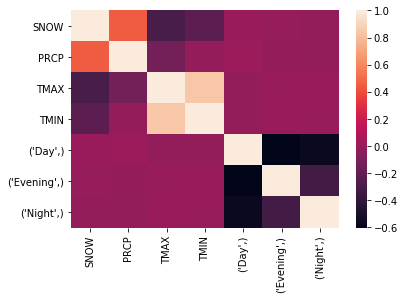

In [49]:
seaborn.heatmap(data2.corr())

In [56]:
data2["IncidentClassification"].value_counts()

EMS                16650
MVA                 4891
Structure Fire       857
Vegetation Fire      322
Ice Rescue            19
Name: IncidentClassification, dtype: int64

In [57]:
EMS = data2[data2["IncidentClassification"]=="EMS"].sample(322)

In [58]:
MVA = data2[data2["IncidentClassification"]=="MVA"].sample(322)

In [59]:
SFire = data2[data2["IncidentClassification"]=="Structure Fire"].sample(322)

In [60]:
vfire = data2[data2["IncidentClassification"]=="Vegetation Fire"].sample(322)

In [67]:
data3 = pd.concat([vfire, EMS, MVA, SFire])

In [68]:
X = data3.drop("IncidentClassification", axis=1)
Y = data3["IncidentClassification"]

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [70]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.453416149068323

In [71]:
Y_predicted = rf.predict(X_test)
confusion_matrix(Y_predicted, y_test)

array([[22, 21, 10, 11],
       [33, 26, 11, 13],
       [21, 16, 47,  6],
       [16, 12,  6, 51]], dtype=int64)